In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import sys
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2

In [6]:

gpu_devices = tf.config.experimental.list_physical_devices('GPU')

for device in gpu_devices:
    print(device)
    tf.config.experimental.set_memory_growth(device, True)

In [2]:
vgg16_pretrained = keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top = True,
    input_shape = (224, 224, 3)
)

In [8]:
# ! pip install pydot
! pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [3]:
keras.utils.plot_model(vgg16_pretrained)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [4]:
print(vgg16_pretrained.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

(1, 224, 224, 3)


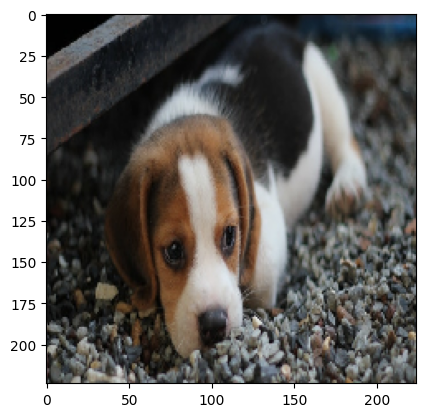

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


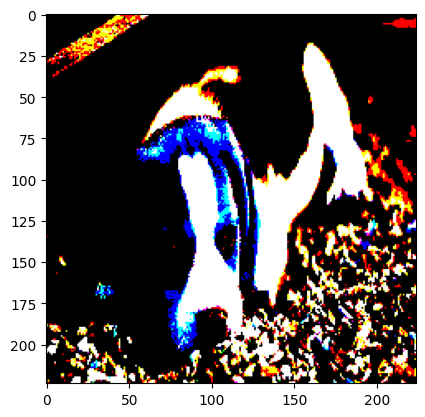

In [31]:
# img_path = '../../opencv_module/googlenet_pb/fig/car1.jpg'
# img_path = '../../opencv_module/googlenet_pb/fig/airplane_1.jpg'
img_path = '../../opencv_module/googlenet_pb/fig/beagle.jpg'


img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = keras.applications.vgg16.preprocess_input(x)
# print(img)
# print(type(x))
# print(x.dtype)
print(x.shape)

plt.imshow(img)
plt.show()

plt.imshow(x[0])
plt.show()

In [32]:
output = vgg16_pretrained.predict(x)

classNames = keras.applications.vgg16.decode_predictions(output, top = 3)
# print(np.argmax(output[0].flatten()))
print(classNames)
classNames[0][0]

1/1 [==============================] - 0s 150ms/step
[[('n02088364', 'beagle', 0.8938539), ('n02088238', 'basset', 0.057736672), ('n02089867', 'Walker_hound', 0.025598489)]]


('n02088364', 'beagle', 0.8938539)

In [33]:
className = classNames[0][0][1]
prob = classNames[0][0][2]

print(className, prob)

beagle 0.8938539


In [34]:
img_opencv = cv2.imread(img_path)

text = f'{className}, {prob*100:.2f}%'
cv2.putText(img_opencv, text, (10, 30), cv2.FONT_HERSHEY_COMPLEX, 0.8,
            (0, 0, 255), 1, cv2.LINE_AA)
cv2.imshow('image', img_opencv)
cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
import glob

# vgg16_pretrained = keras.applications.vgg16.VGG16(
#     weights = 'imagenet',
#     include_top = True,
#     input_shape = (224, 224, 3)
# )

def img_prep(x):
    x = keras.preprocessing.image.load_img(i, target_size=(224, 224))
    x = keras.preprocessing.image.img_to_array(x)
    x = np.expand_dims(x, axis = 0)
    x = keras.applications.vgg16.preprocess_input(x)
    return x

img_paths = glob.glob('../../opencv_module/googlenet_pb/fig/*.*')
display(img_paths)

for i in img_paths:
    
    x = img_prep(i)
    output = vgg16_pretrained.predict(x)
    
    classNames = keras.applications.vgg16.decode_predictions(output, top = 3)
    className = classNames[0][0][1]
    prob = classNames[0][0][2]
    
    img_opencv = cv2.imread(i)
    text = f'{className}, {prob*100:.2f}%'
    cv2.putText(img_opencv, text, (10, 30), cv2.FONT_HERSHEY_COMPLEX, 0.8,
                (0, 0, 255), 1, cv2.LINE_AA)
    
    cv2.imshow('image', img_opencv)
    
    key = cv2.waitKey(3000)
    
    if key ==  27 or key == ord('q'):
        break

cv2.destroyAllWindows()
    

['../../opencv_module/googlenet_pb/fig\\airplane_1.jpg',
 '../../opencv_module/googlenet_pb/fig\\airplane_2.jpeg',
 '../../opencv_module/googlenet_pb/fig\\apple1.jpg',
 '../../opencv_module/googlenet_pb/fig\\apple1.png',
 '../../opencv_module/googlenet_pb/fig\\apple2.png',
 '../../opencv_module/googlenet_pb/fig\\banana1.jpg',
 '../../opencv_module/googlenet_pb/fig\\beagle.jpg',
 '../../opencv_module/googlenet_pb/fig\\car1.jpg',
 '../../opencv_module/googlenet_pb/fig\\car2.jpg',
 '../../opencv_module/googlenet_pb/fig\\cat1.jpg',
 '../../opencv_module/googlenet_pb/fig\\dog1.jpg',
 '../../opencv_module/googlenet_pb/fig\\dog2.jpg',
 '../../opencv_module/googlenet_pb/fig\\fish.jpg',
 '../../opencv_module/googlenet_pb/fig\\pineapple.jpg',
 '../../opencv_module/googlenet_pb/fig\\scooter.jpg',
 '../../opencv_module/googlenet_pb/fig\\space_shuttle.jpg']

1/1 [==============================] - 0s 133ms/step


In [8]:
## Functional API
inputs = keras.Input(shape = (150, 150, 3))
Conv1 = keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu')(inputs)
Conv2 = keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu')(Conv1)
max_pool = keras.layers.MaxPool2D(pool_size = 2)(Conv2)
flatten = keras.layers.Flatten()(max_pool)
dense1 = keras.layers.Dense(120, activation = 'relu')(flatten)
drop_out = keras.layers.Dropout(0.3)(dense1)
dense2 = keras.layers.Dense(32, activation = 'relu')(drop_out)
outputs = keras.layers.Dense(1, activation = 'sigmoid')(dense2)

alz_model = keras.Model(inputs = inputs, outputs = outputs)
alz_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 146, 146, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 170528)            0         
                                                                 
 dense_3 (Dense)             (None, 120)               20463480  
                                                           

In [3]:
import glob

In [4]:
img_path_ad = glob.glob('./train/ad/*.*') + glob.glob('./test/ad/*.*')
img_path_normal = glob.glob('./train/normal/*.*') + glob.glob('./test/normal/*.*')
img_paths = img_path_ad + img_path_normal

target = np.array([1]*len(img_path_ad) + [0]*len(img_path_normal))
# display(len(img_paths))
# display(len(img_path_ad))
# print(target)
# print(len(target))
# display(img_paths)

imgs = np.zeros((0, 150, 150, 3), np.float32)

for img_path in img_paths:
    img = cv2.imread(img_path)
    img = (img.astype(np.float32))/255.
    img = np.expand_dims(img, axis = 0)
    imgs = np.append(imgs, img, axis = 0)

print(imgs.shape)

(280, 150, 150, 3)


In [60]:
! pip install scikit-learn

  Using cached scikit_learn-1.2.2-cp38-cp38-win_amd64.whl (8.3 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    imgs, target, test_size= 0.2, shuffle=True)

print(X_train.shape)
print(y_train.shape)


(224, 150, 150, 3)
(224,)


In [9]:
alz_model.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['acc'])

# checkpoint = keras.callbacks.ModelCheckpoint(filepath = './alz_model.h5',
#                                              save_best_only = True)
# early_stop = keras.callbacks.EarlyStopping(patience=10)

In [10]:
history = alz_model.fit(X_train, y_train, epochs=15,
                        batch_size = 20,
                        validation_data = (X_val, y_val))

Epoch 1/15
12/12 [==============================] - 8s 606ms/step - loss: 0.8018 - acc: 0.5625 - val_loss: 0.6822 - val_acc: 0.6607
Epoch 2/15
12/12 [==============================] - 7s 590ms/step - loss: 0.6312 - acc: 0.7232 - val_loss: 0.4850 - val_acc: 0.7679
Epoch 3/15
12/12 [==============================] - 7s 589ms/step - loss: 0.3896 - acc: 0.8348 - val_loss: 0.1698 - val_acc: 0.9643
Epoch 4/15
12/12 [==============================] - 7s 591ms/step - loss: 0.2130 - acc: 0.9241 - val_loss: 0.3415 - val_acc: 0.8929
Epoch 5/15
12/12 [==============================] - 8s 640ms/step - loss: 0.1144 - acc: 0.9643 - val_loss: 0.0669 - val_acc: 0.9821
Epoch 6/15
12/12 [==============================] - 8s 640ms/step - loss: 0.0532 - acc: 0.9777 - val_loss: 0.0491 - val_acc: 0.9821
Epoch 7/15
12/12 [==============================] - 8s 629ms/step - loss: 0.0421 - acc: 0.9911 - val_loss: 0.0998 - val_acc: 0.9643
Epoch 8/15
12/12 [==============================] - 7s 618ms/step - loss: 0.

In [12]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

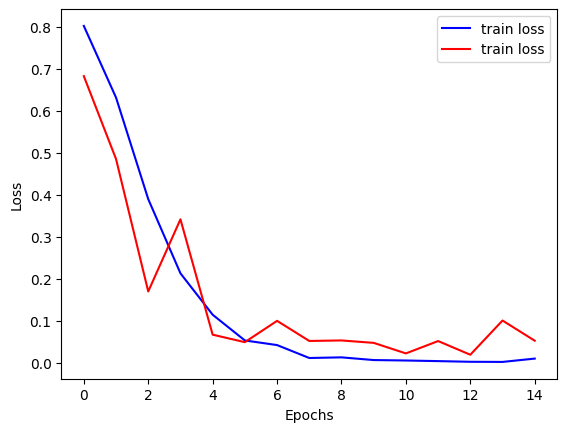

In [14]:
plt.plot(history.history['loss'], color = 'b', label = 'train loss')
plt.plot(history.history['val_loss'], color = 'r', label = 'train loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [20]:
alz_model.evaluate(X_val, y_val)
X_test = np.expand_dims(X_val[0], axis = 0)
print(X_test.shape)
alz_model.predict(X_val)

2/2 [==============================] - 0s 100ms/step - loss: 0.0526 - acc: 0.9643
(1, 150, 150, 3)
2/2 [==============================] - 0s 96ms/step


array([[3.66560707e-05],
       [6.58548653e-01],
       [9.98633683e-01],
       [9.99968827e-01],
       [5.17292880e-04],
       [9.99982715e-01],
       [9.99976397e-01],
       [1.80650557e-06],
       [1.80118834e-04],
       [6.69346207e-07],
       [9.97783124e-01],
       [9.99568343e-01],
       [9.99992192e-01],
       [9.99960661e-01],
       [9.99978602e-01],
       [9.99979019e-01],
       [1.09750025e-01],
       [9.99978065e-01],
       [1.42397357e-05],
       [6.75001356e-05],
       [6.73087896e-04],
       [9.99920368e-01],
       [9.99981761e-01],
       [9.99962091e-01],
       [6.83122835e-07],
       [3.32370996e-06],
       [1.77186339e-05],
       [2.05584856e-05],
       [9.99955237e-01],
       [9.99925017e-01],
       [6.58616264e-05],
       [9.89974558e-01],
       [1.04269193e-05],
       [9.99987423e-01],
       [9.20260549e-01],
       [4.00251993e-05],
       [1.63210847e-04],
       [7.88033426e-01],
       [4.69092356e-06],
       [1.24383469e-05],


In [22]:
## Transfer learning

transfer_vgg16 = keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape= (150, 150, 3)
)

transfer_vgg16.trainable = False
transfer_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [23]:
finetune_vgg16 = keras.Sequential()
finetune_vgg16.add(transfer_vgg16)
finetune_vgg16.add(keras.layers.Flatten())
finetune_vgg16.add(keras.layers.Dense(64, activation = 'relu'))
finetune_vgg16.add(keras.layers.Dropout(0.3))
finetune_vgg16.add(keras.layers.Dense(1, activation = 'sigmoid'))

finetune_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                524352    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
finetune_vgg16.compile(loss = 'binary_crossentropy',
                       optimizer = 'adam',
                       metrics = 'acc')



In [26]:
history = finetune_vgg16.fit(X_train, y_train,
                             epochs = 10,
                             batch_size = 20,
                             validation_data = (X_val, y_val))

Epoch 1/10
12/12 [==============================] - 9s 703ms/step - loss: 0.8358 - acc: 0.5580 - val_loss: 0.5891 - val_acc: 0.8571
Epoch 2/10
12/12 [==============================] - 9s 768ms/step - loss: 0.5277 - acc: 0.7545 - val_loss: 0.4647 - val_acc: 0.8750
Epoch 3/10
12/12 [==============================] - 11s 963ms/step - loss: 0.4382 - acc: 0.7902 - val_loss: 0.4113 - val_acc: 0.8571
Epoch 4/10
12/12 [==============================] - 12s 986ms/step - loss: 0.3751 - acc: 0.8616 - val_loss: 0.3453 - val_acc: 0.9286
Epoch 5/10
12/12 [==============================] - 11s 963ms/step - loss: 0.3240 - acc: 0.8661 - val_loss: 0.3016 - val_acc: 0.8929
Epoch 6/10
12/12 [==============================] - 11s 945ms/step - loss: 0.2896 - acc: 0.8839 - val_loss: 0.2778 - val_acc: 0.8750
Epoch 7/10
12/12 [==============================] - 11s 929ms/step - loss: 0.2647 - acc: 0.8795 - val_loss: 0.2495 - val_acc: 0.9464
Epoch 8/10
12/12 [==============================] - 11s 933ms/step - lo

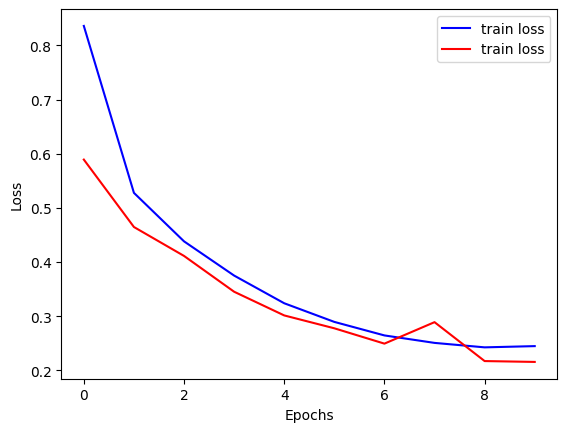

In [27]:
plt.plot(history.history['loss'], color = 'b', label = 'train loss')
plt.plot(history.history['val_loss'], color = 'r', label = 'train loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
